In [2]:
import cv2
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import datetime as dt

In [3]:
dir_bars = '/Volumes/pao_inf/TFM/cosas_barras/lineas_entb/'

In [ ]:
o = 0
for filemat in [item for item in os.listdir(dir_bars) if item[-3:]=='mat']:
    print(filemat)
    o +=1
    if o ==34:
        mat = sio.loadmat(os.path.join(dir_bars,filemat))
        break

In [ ]:
mat['blimline_5'][0][-1]

In [ ]:
kk5.tail()

In [ ]:
kk5 = pd.DataFrame(mat['blimline_5']).T
kk6 = pd.DataFrame(mat['blimline_6']).T
#kk7 = pd.DataFrame(mat['blimline_8']).T

In [ ]:
kk5.columns = ['x', 'y']
kk6.columns = ['x', 'y']
kk7.columns = ['x', 'y']

In [ ]:
plt.plot(kk5['x'], kk5['y'], color = 'c')
plt.plot(kk6['x'], kk6['y'], color = 'y')
plt.plot(kk7['x'], kk7['y'], color = 'g')



In [ ]:
img = cv2.imread('1396380600.Tue.Apr.01_19_30_00.GMT.2014.sisal.plan.jpg')
img2 = img[:,:,::-1]
plt.plot(kk5['x'], kk5['y'], color = 'c')
plt.plot(kk6['x'], kk6['y'], color = 'y')
plt.plot(kk7['x'], kk7['y'], color = 'g')
plt.imshow(img)

In [ ]:
## Tenemos que usar la carpeta enteras buenas
## Vamos a intentar reproducir mi codigo de matlab, y despuès aplicarlo a los nuevos datos

In [ ]:
dt.datetime.fromtimestamp(1396380600)

In [4]:
vec_fecha = []
blim_com_t = []
blim_fin_t = []

for filemat in [item for item in os.listdir(dir_bars) if item[-3:]=='mat']:
    str_date = filemat[0:10]
    date = dt.date.fromtimestamp(int(str_date)) # aqui lo hacemos asi porque no es lo que nos interesa ahora, falta tzinfo
    mat = sio.loadmat(os.path.join(dir_bars,filemat))
    if 'blimline_6' in mat:
        B = mat['blimline_6'] # carga el mat
        long_al = B[0] # coge todas las longitudes
        blim_com = long_al[0] # coge el inizio
        blim_fin = long_al[-1] # coge el final
        blim_com_t.append(blim_com)
        blim_fin_t.append(blim_fin)
        vec_fecha.append(date)
    else:
        continue
    # Transformamos 
    


In [5]:
max_blim = np.max(blim_fin_t) # Cual es la longitud mas larga
min_blim = np.min(blim_com_t) # Cual es la longitud mas pequeña
# De esta manera definimos la longitud posible màs larga
dif_com_blim = blim_com_t-min_blim # no entiendo este paso
dif_fin_blim=max_blim-blim_fin_t   # estos dos pasos no entiendo porque los hice

# Es una manera de normalizar el eje? Boh

In [6]:
long_t = pd.DataFrame() # tienen que ser matrices
cross_t = pd.DataFrame()
o = 0
for filemat in [item for item in os.listdir(dir_bars) if item[-3:]=='mat']:
    mat = sio.loadmat((os.path.join(dir_bars, filemat)))
    o =+1
    if 'blimline_6' in mat:

        B = mat['blimline_6']
        # generamos los nan del inicio (barra mas corta)
        #nan_beg = np.empty((1, -dif_com_blim[o].astype(int))) 
        #nan_beg[:] = np.NaN
        #nan_beg = list(nan_beg[0])
        # generamos los nan del final
        #nan_fin = np.empty((1, dif_fin_blim[o].astype(int)))
        #nan_fin[:] = np.NaN
        #nan_fin = list(nan_fin[0])
        
        a1 = np.full(dif_com_blim[o].astype(int), np.nan)
        a2 = np.full(dif_fin_blim[o].astype(int), np.nan)
        
        BBL = B[0]/2
        #BBL = list(BBL)
        #longi = BBL
        
        BBC = B[1]/2 #no se porque divide entre 2
        #BBC =list(BBC)
        #cross = BBC
        
        longi = np.concatenate([a1, BBL, a2])
        cross = np.concatenate([a1, BBC, a2])
        
        ## Se lo tenemos que añadir se al vector cross que lon
        #if len(nan_beg)>0:
            #longi.insert(0,nan_beg)
            #longi.append(nan_fin)
            
        #if nan_fin>0:
            #cross.insert(0,nan_beg)
            #cross.append(nan_fin)
        
        new_df = pd.DataFrame(list(longi))
        new_df2 = pd.DataFrame(list(cross))
        long_t = pd.concat([long_t, new_df], axis=1)
        cross_t = pd.concat([cross_t, new_df2], axis=1)
        #long_t.concat(longi)
        #cross_t.concat(cross)
    else:
        continue
        
numbers = list(range(len(long_t.columns)))
long_t.columns = numbers
cross_t.columns = numbers

In [7]:
vec_cross_media = []
o = 0
for column in cross_t: # matlab equivalent (:,i)
    o+=1
    mean_c = cross_t[column].mean(skipna=True)
    vec_cross_media.append(mean_c)

print('Numero de columnas', o)

('Numero de columnas', 106)


In [8]:
len(vec_cross_media)

106

In [9]:
vec_lon = np.linspace((min_blim/2), (max_blim/2), len(vec_cross_media))

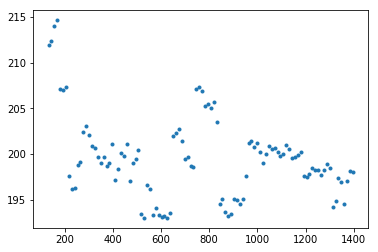

In [10]:
plt.plot(vec_lon, vec_cross_media, '.')

In [11]:
cross_desv = pd.DataFrame()
for row in range(len(cross_t)):
    df = pd.DataFrame(cross_t.iloc[row,:] - vec_cross_media)
    cross_desv = pd.concat([cross_desv, df], axis=1)
    

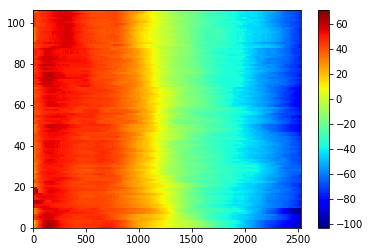

In [209]:
plt.pcolor(cross_desv, cmap='jet')
plt.colorbar()

In [181]:
cross_desv.shape

(106, 2532)

In [14]:
### VAMOS A PROBARLO A HACER A MI MANERA

In [272]:
vec_fecha = []
blim_com_t = []
blim_fin_t = []

for filemat in [item for item in os.listdir(dir_bars) if item[-3:]=='mat']:
    str_date = filemat[0:10]
    date = dt.date.fromtimestamp(int(str_date)) # aqui lo hacemos asi porque no es lo que nos interesa ahora, falta tzinfo
    mat = sio.loadmat(os.path.join(dir_bars,filemat))
    if 'blimline_6' in mat:
        B = mat['blimline_6'] # carga el mat
        long_al = B[0] # coge todas las longitudes
        blim_com = long_al[0] # coge el inizio
        blim_fin = long_al[-1] # coge el final
        blim_com_t.append(blim_com)
        blim_fin_t.append(blim_fin)
        vec_fecha.append(date)
    else:
        continue
    # Transformamos 


In [273]:
max_lonf = np.max(blim_fin_t)
min_lonf = np.min(blim_fin_t)
max_loni = np.max(blim_com_t)
min_loni = np.min(blim_com_t)

In [274]:
## Generiamo la matrice X(t,y) como matcros

In [275]:
matal = pd.DataFrame() # tienen que ser matrices
matcr = pd.DataFrame()
o = 0
for filemat in [item for item in os.listdir(dir_bars) if item[-3:]=='mat']:
    mat = sio.loadmat((os.path.join(dir_bars, filemat)))
    o =+1
    if 'blimline_6' in mat:

        B = mat['blimline_6']
        along = B[0]
        cross = B[1]

        if along[0]==min_loni and along[-1] == max_lonf:
            
            longshore = along/2
            crosshore = cross/2
        
        if along[0]>min_loni and along[-1] == max_lonf:
            difi = along[1] - min_loni
            addi = np.full(difi.astype(int), np.nan)
            longshore = np.concatenate([addi, along/2])
            crosshore = np.concatenate([addi, cross/2])

        if along[1] == min_loni and along[-1]<max_lonf:
            diff = max_lonf - along[-1]
            addf = np.full(diff.astype(int), np.nan)
            longshore = np.concatenate([along/2, addf])
            crosshore = np.concatenate([cross/2, addf])
            
        if along[1]>min_loni and along[-1]<max_lonf:
            diff = max_lonf - along[-1]
            addf = np.full(diff, np.nan)
            difi = along[1] - min_loni
            addi = np.full(difi, np.nan)
            longshore = np.concatenate([addi.astype(int), along/2, addf])
            crosshore = np.concatenate([addi.astype(int), cross/2, addf])
        
        
        
        new_df = pd.DataFrame(list(longshore))
        new_df2 = pd.DataFrame(list(crosshore))
        matcr = matcr.append(new_df2.T)
        matal = matal.append(new_df.T)
        #long_t.concat(longi)
        #cross_t.concat(cross)
    else:
        continue
        


In [276]:
matcr.reset_index(drop = True, inplace=True)

In [277]:
# Calculamos Xy(t), es decir, la posición media crosshore de las SH que se tienen

crossme = matcr.mean(axis=0)
crossme = pd.DataFrame(crossme)

In [278]:
#Ahora calculamos la desviacion de cada linea, es decir a cada valor de
#cross de cada linea se le resta crossmedia, es decir, la media de la cross
#de todos los dias

In [279]:
matD = pd.DataFrame()
for i in range(len(matcr)):
    desv = pd.DataFrame(matcr.iloc[i,:] - crossme.T)
    matD = matD.append(desv)

In [280]:
matD.reset_index(drop = True, inplace = True)

In [281]:
vec_escala= np.linspace(min_loni/2,max_lonf/2,len(matD))

In [282]:
matD2 = matD.fillna(0) # por probar que no quede

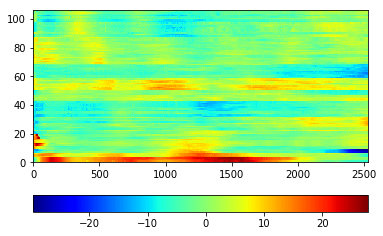

In [283]:
plt.pcolor(matD, cmap='jet')
#plt.axis([np.min(vec_escala), np.max(vec_escala)])
plt.colorbar(orientation='horizontal')       

In [284]:
matD

,0,1,2,3,4,5,6,7,8,9,...,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527
0,NaN,NaN,NaN,NaN,NaN,NaN,-7.298996,-6.039062,-4.949333,-3.335159,...,-2.233477,-2.186894,-2.101417,-2.049601,-1.988195,-1.905653,-1.737353,-1.701073,-1.768715,-1.804050
1,NaN,NaN,NaN,NaN,NaN,NaN,-8.798996,-8.557798,-8.056916,-6.887385,...,-6.427323,-6.393020,-6.318341,-6.273869,-6.466455,-6.390212,-6.478776,-6.433442,-6.391493,-6.468868
2,NaN,NaN,NaN,NaN,NaN,NaN,-8.298996,-6.933391,-8.054666,-6.886911,...,-0.428034,-0.393020,-1.067630,-0.024816,0.033072,0.109788,-1.227828,-0.184390,-0.141493,-1.218157
3,NaN,NaN,NaN,NaN,NaN,NaN,-8.798996,-8.057799,-6.557153,-4.887384,...,0.322677,0.356980,0.431659,0.226368,0.283072,0.359788,0.270987,0.066794,0.108507,0.280659
4,NaN,NaN,NaN,NaN,NaN,NaN,10.351004,11.116207,10.614987,10.995111,...,-5.968845,-6.254496,-6.574598,-6.825830,-6.880201,-6.868850,-6.824636,-6.972759,-7.103829,-7.169066
5,NaN,NaN,NaN,NaN,NaN,NaN,9.951004,11.928269,12.191156,12.863554,...,-6.952709,-7.030414,-6.963234,-6.739038,-6.621985,-6.715051,-6.716866,-6.713401,-7.016166,-7.359852
6,NaN,NaN,NaN,NaN,NaN,NaN,7.501004,8.615544,8.638992,8.567469,...,-3.345808,-3.205608,-3.113350,-3.068869,-3.084359,-3.260472,-3.372687,-3.453273,-3.249168,-3.094325
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10.803104,...,-27.189576,-27.143052,-27.069855,-27.034866,-26.971996,-26.888196,-26.744387,-26.705479,-26.641568,-26.469341
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.136437,...,-27.412974,-27.161206,-27.059092,-27.086596,-27.084273,-27.019968,-26.989862,-27.129307,-27.119410,-26.956797
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.936437,...,-29.412716,-29.162926,-29.068359,-29.243660,-29.678462,-29.662605,-29.241996,-29.233301,-29.567841,-29.597109
